##Data Narrative
**German Credit Risk** was prepared by Prof. Hofmann which contains certain number of data entries each of which correspond to an applicant of a german bank.
The original dataset contains 1000 rows and 20 columns which has been used in this project.
There are 20 features in the dataset that are either qualitative or numerical.
Certain features like "credit_amount", "age" are continous numericals whereas rest all are qualitative falling in between range of 5 to 1.
The original features were impossible to decode and hence I have converted them into simple numrical representations.

Note:
Data source- *http*://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/

##Business Case
Each applicant from the dataset is either classified as "1" or "2" on the original dataset which I infer to be "No Risk' and "Risk".

This is clearly a case of Binary classfification; where an applicant for a given set of his personal details should be categorized into either "Risk" or "No Risk" applicant.
  Coming up with a good model will certainly help the bankers to understand customers, their lifestyle trends and associations.
  It can further help in classifying a new customer who opens an account with the bank if he will require a loan or not in the future too.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/Shared drives/MidTerm/datasets/german.data",delim_whitespace = True, header = None)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
columns = ['checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
'saving_account', 'present_emp_since', 'install_rate', 'personal_status',
'other_debtors', 'residence_since', 'property', 'age', 'invest_plans',
'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'Risk']

df.columns = columns

Applying Cat.codes to convert the dataset into integer type to feed it to all types of algorithms. 
Similarily, converting the Y-Label i.e. risk to binary to ensure there will be no biasing while model generation.

In [ ]:
for cols in ['checking_account', 'credit_history', 'purpose', 'saving_account', 'present_emp_since', 'personal_status', 'other_debtors','property', 'invest_plans', 'housing','job', 'telephone','foreign_worker']:
    df[cols] = df[cols].astype('category')
    df[cols] = df[cols].cat.codes

In [ ]:
df.Risk.replace([1,2], [1,0], inplace=True)

In [ ]:
df.head(3)

,checking_account,duration,credit_history,purpose,credit_amount,saving_account,present_emp_since,install_rate,personal_status,other_debtors,residence_since,property,age,invest_plans,housing,num_credits,job,dependents,telephone,foreign_worker,Risk
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0,0
2,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0,1


Creating a checkpoint for the converted Data.Named it new_german.csv

In [ ]:
df.to_csv("/content/drive/Shared drives/MidTerm/datasets/new_german.csv", index=False)

The above data file contains the Data in numeric values; with cleaned Target Feature.
The Exploratory data analysis, modelling and Inteference has been done on this file.

##Exploratory Data Analysis

To find the correlation between all the features of the dataset, we generated the following matrix:

In [ ]:
df.corr()

,checking_account,duration,credit_history,purpose,credit_amount,saving_account,present_emp_since,install_rate,personal_status,other_debtors,residence_since,property,age,invest_plans,housing,num_credits,job,dependents,telephone,foreign_worker,Risk
checking_account,1.000000,-0.072013,0.192191,0.053223,-0.042705,0.222867,0.106339,-0.005280,0.043261,-0.127737,-0.042234,-0.032260,0.059751,0.046841,0.022424,0.076005,0.040663,-0.014145,0.066296,-0.026758,0.350847
duration,-0.072013,1.000000,-0.077186,0.096027,0.624984,0.047661,0.057381,0.074749,0.014789,-0.024490,0.034067,0.303971,-0.036136,-0.054884,0.157049,-0.011284,0.210910,-0.023834,0.164718,-0.138196,-0.214927
credit_history,0.192191,-0.077186,1.000000,-0.081634,-0.059905,0.039058,0.138225,0.044375,0.042171,-0.040676,0.063198,-0.053777,0.147086,0.121973,0.062095,0.437066,0.010350,0.011550,0.052370,0.013873,0.228785
purpose,0.053223,0.096027,-0.081634,1.000000,-0.030848,-0.024072,0.024990,0.078224,-0.003052,-0.032254,-0.062927,-0.031025,-0.030654,-0.039346,-0.019488,0.034958,-0.032655,-0.056450,0.018677,-0.124317,-0.001514
credit_amount,-0.042705,0.624984,-0.059905,-0.030848,1.000000,0.064630,-0.008367,-0.271316,-0.016091,-0.027832,0.028926,0.311599,0.032716,-0.046008,0.135632,0.020795,0.285385,0.017142,0.276995,-0.050050,-0.154739
saving_account,0.222867,0.047661,0.039058,-0.024072,0.064630,1.000000,0.120950,0.021993,0.017349,-0.105069,0.091424,0.018948,0.084245,0.001908,0.006505,-0.021644,0.011709,0.027514,0.087208,0.007095,0.178943
present_emp_since,0.106339,0.057381,0.138225,0.024990,-0.008367,0.120950,1.000000,0.126161,0.111278,-0.008116,0.245081,0.087187,0.256227,-0.040154,0.111126,0.125791,0.101225,0.097192,0.060518,-0.027232,0.116002
install_rate,-0.005280,0.074749,0.044375,0.078224,-0.271316,0.021993,0.126161,1.000000,0.119308,-0.011398,0.049302,0.053391,0.058266,-0.000983,0.089405,0.021669,0.097755,-0.071207,0.014413,-0.090024,-0.072404
personal_status,0.043261,0.014789,0.042171,-0.003052,-0.016091,0.017349,0.111278,0.119308,1.000000,0.050634,-0.027269,-0.006940,0.007783,-0.036765,0.099579,0.064672,-0.011956,0.122165,0.027275,0.065618,0.088184
other_debtors,-0.127737,-0.024490,-0.040676,-0.032254,-0.027832,-0.105069,-0.008116,-0.011398,0.050634,1.000000,-0.025678,-0.155450,-0.029873,-0.059023,-0.065889,-0.025447,-0.057963,0.020400,-0.075035,0.117999,0.025137


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
date_int = ['purpose', 'personal_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

personal_status,0,1,2,3
purpose,,,,
0,10,70,134,20
1,3,24,70,6
2,1,3,8,0
3,15,74,85,7
4,7,85,146,42
5,1,6,4,1
6,2,5,12,3
7,1,21,27,1
8,0,3,3,3


**Inferences:**
The above cross tab explains the relation between two features: purpose and personal status. 
Inferences are:

*  Maximum number of Females who are single had to get a credit for repairs which is 146 in number.
*  Around 136 males who are singles had to get a new car for which they needed credit.






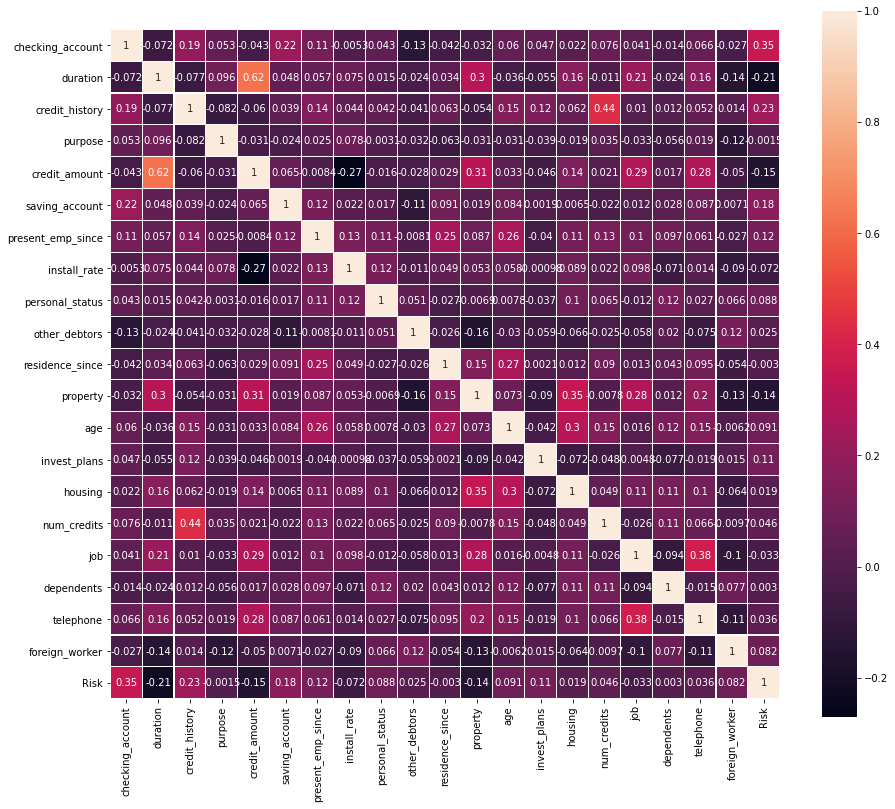

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

**Inferences from the Heat Map:**



*   There are no highly correlated features in the dataset; i.e. no two features have a correlation more than 62%.

*   Few features in the dataset exhibit both positive and negative correlations.
*   Features Credit amount and Duration are most correlated.


*  Credit History and Number of credits almost exhibit decent correlation.
There are no features that are directly correlated with our Target Variable i.e. "Risk".


*   Suprisingly, the credit amount and the risk features that are supposed to be more dependent on each other exhibit only 25% of correlation in our dataset.









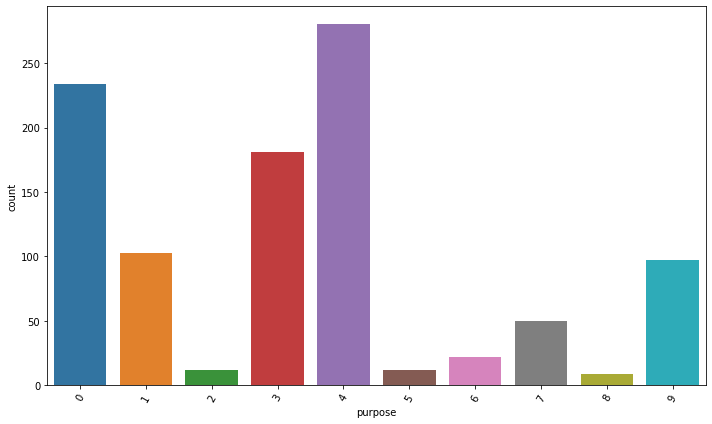

In [ ]:
n_credits = df.groupby("purpose")["age"].count().rename("count").reset_index()
n_credits.sort_values(by=["count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="purpose",y="count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
#plt.ylabel("Number of granted credits")
plt.tight_layout()

**Inference from bar plot:**
The barplot above shows how many credits were granted for various purposes. Most of credits were granted for car and radio/TV.

In [ ]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

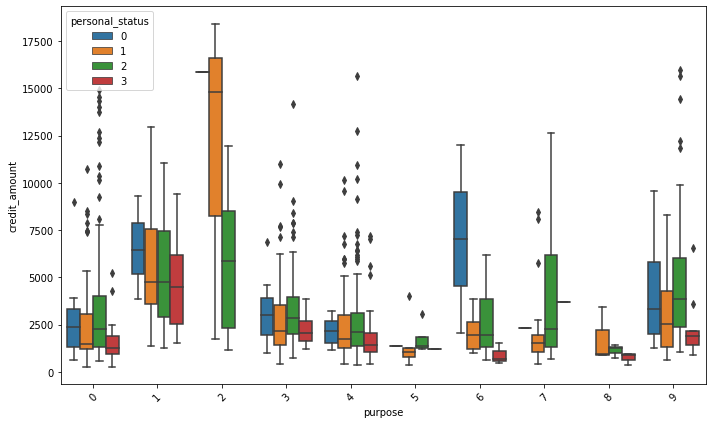

In [ ]:
boxes("purpose","credit_amount","personal_status")



*   The above box plots plotted for purpose and credit amount are as follows:
1. A lot of repairs have taken place for an unusual credit amount.
2. Similarily, a lot of new cars have been purchased , provided an unsually high credit amount.
However, there is no direct inference we can draw that can help us remove outliers.



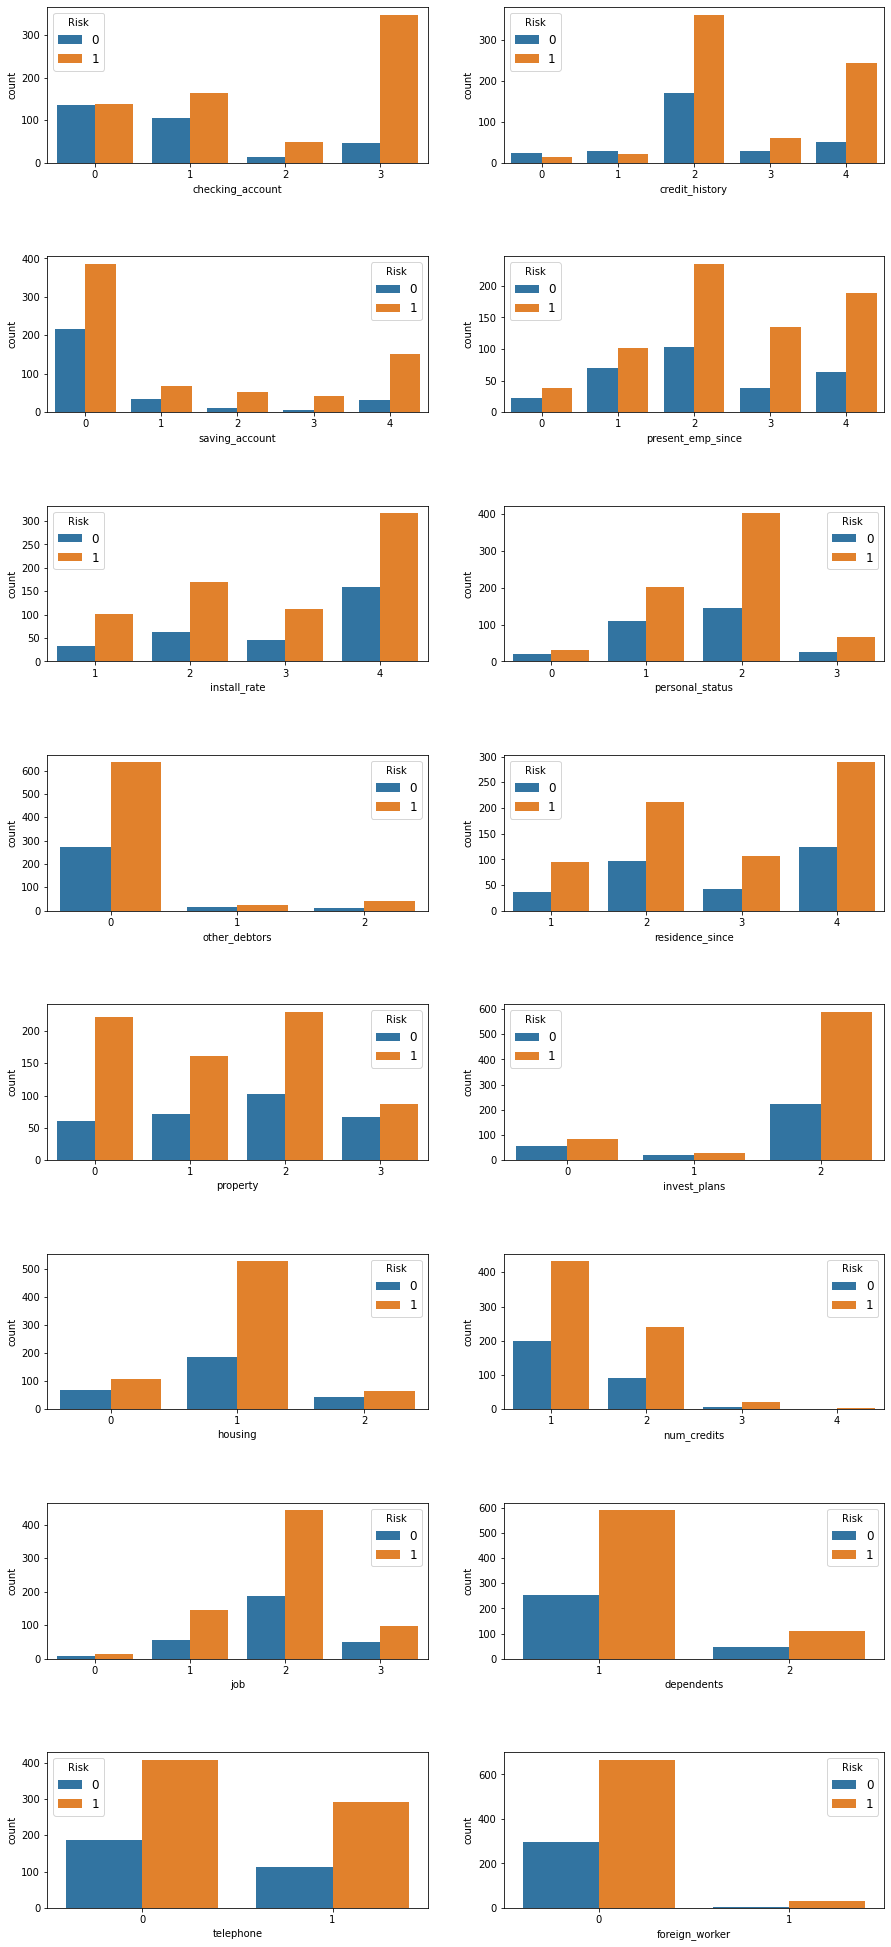

In [ ]:
target_column = ["Risk"]
singular_list = []
category_cols = df.nunique()[df.nunique() <= 8].keys().tolist()
category_cols = [x for x in category_cols if x not in target_column]
category_cols = [col for col in category_cols if col not in (singular_list +['Risk'])]
fighure, axes = plt.subplots(nrows=8, ncols=2, figsize=(15,30))
fighure.subplots_adjust(hspace=0.6, bottom=0)
for ax, catplot in zip(axes.flatten(), category_cols):
        sns.countplot(x=catplot, data=df, hue='Risk', ax=ax, )
        ax.legend(title='Risk', fontsize=12)

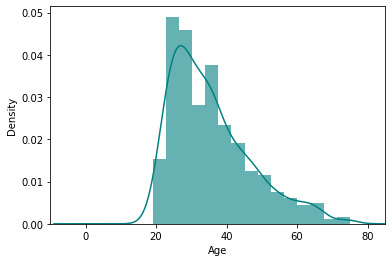

In [ ]:
ax = df["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

**The inference that can be drawn from the above density-distribution graph is that**:
1. a lot of applicants who came for the loan are aged between 20 and 40.
2. Also, There are a few or no applicants who are above age 70.

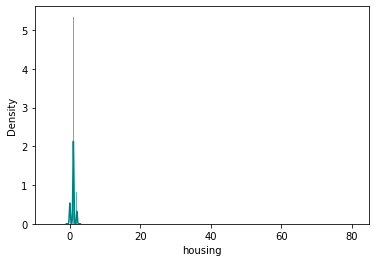

In [ ]:
ax = df["housing"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["housing"].plot(kind='density', color='teal')
ax.set(xlabel='housing')
plt.xlim(-10,85)
plt.show()

This density graph plotted against the housing feature states that majority of the Loan seekers or the applicants who don't own a house are the applicants.

Now, lets go use the data to build various Supervised and Unspuervised Algorithms.
The Following Algorithms have been implemented on the original Dataset:
1. Guassian Mixture Models
2. Logistic Regression
3. Linear Regression
4. K-Means Custering
5. Random Forest
6. XG Boost
7. Support Vector Machines
8. Gaussian Naive Bayes
9. K-Nearest Neighnours
10. Decision Trees

The performance of each of the model is analysed using various metrics:
1. Accuracy Score
2. Precision
3. Recall
4. Confusion Matrix
5. ROC_curve
6. AUC


##Machine Learning Models

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import collections
from sklearn.mixture import GaussianMixture
from collections import Counter
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

##Latent Manifold Method
###Finding the Latent Variable

Before we proceed to run our models, We find the entropy of all the features present in the dataset. The features with highest entropy value can be choosen as the prominent ones that contribute to our model.

In [ ]:
y = df['Risk']
X = df.drop(['Risk'], axis=1)

In [ ]:
for col in X.columns:
    entropy = stats.entropy(df[col].values, base=2)
    print(str(col) +":" + str(entropy))

checking_account:9.355100314573386
duration:9.742949248120654
credit_history:9.811512769964871
purpose:9.367789459325085
credit_amount:9.534288964660222
saving_account:8.464369477714227
present_emp_since:9.738736295052579
install_rate:9.850345073894974
personal_status:9.804279677413863
other_debtors:6.46266771070459
residence_since:9.847331307027915
property:9.37909937298319
age:9.896658673912027
invest_plans:9.738005081725037
housing:9.627026713185666
num_credits:9.856319299760642
job:9.863450457467508
dependents:9.90527886790515
telephone:8.658211482751796
foreign_worker:5.20945336562895


Hence as we see, the entropy of all the features nearly falls in the same range and hence it shows that the information isn't concentrated in just few variables.
All the features seem to be equally important with equal distribution of entropy.
However, Features like **'dependents'** **'num_credits'**, **'credit_history'**, **'duration'**, **'install_rate'** seem to have very high entropy.

###Splitting the Original Dataset for training and testing

In [ ]:
Y=df.Risk
X=df.drop('Risk',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

#Gaussian Mixture Model

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_train,Y_train)
gmm.y = gmm.predict(X_test)
print(metrics.accuracy_score(Y_test,gmm.y))

0.344


In [ ]:
print(confusion_matrix(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

[[ 13  56]
 [ 32 149]]
Precision: 0.7268292682926829
Recall: 0.8232044198895028


In [ ]:
fpr,tpr,tresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.505805108495476

(-0.05, 1.05, -0.05, 1.05)

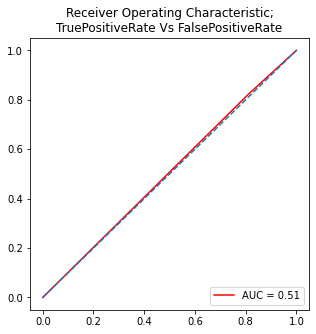

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic;\nTruePositiveRate Vs FalsePositiveRate')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')


**Inference:**

Gaussian Mixture Model is just another clustering where we have multiple Gaussians depending on th number of clusters we are forming.
The AUC value is 0.5 which means the probability of a random sample being placed correctly is 0.5.
Also, the False Positives are 34; which is a TYpe II error considered more worse for this dataset.

#Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
logreg.y = logreg.predict(X_test)
print(metrics.accuracy_score(Y_test,logreg.y))

0.756


In [ ]:
print(confusion_matrix(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

[[ 13  56]
 [ 32 149]]
Precision: 0.7268292682926829
Recall: 0.8232044198895028


In [ ]:
fpr,tpr,tresholds = roc_curve(Y_test, logreg.y)
roc_auc = auc(fpr, tpr)
roc_auc

0.6700696613019457

(-0.05, 1.05, -0.05, 1.05)

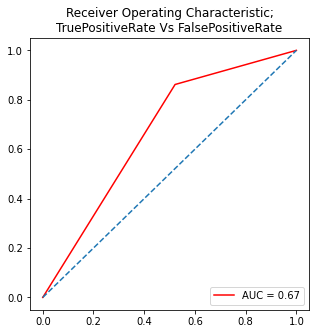

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic;\nTruePositiveRate Vs FalsePositiveRate')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')


**Inference:**

Logistic Regression is a classification algorithm that has generated an accuracy of 76%, decently potraying the relationship between the binary variable "Risk" and the rest of the features. The AUC value is 0.67 which means the probability of a random sample being placed correctly is 0.67. Also, the False Positives are 34; which is a TYpe II error considered more worse for this dataset.

#Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print ("Mean Squared Error:" + str(mse))

Mean Squared Error:0.17424510503202073


In [ ]:
fpr,tpr,tresholds = roc_curve(Y_test, logreg.y)
roc_auc = auc(fpr, tpr)
roc_auc

0.6700696613019457

(-0.05, 1.05, -0.05, 1.05)

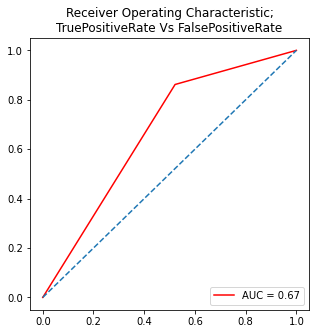

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic;\nTruePositiveRate Vs FalsePositiveRate')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')

#Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [ ]:
x_pca.shape

(1000, 2)

In [ ]:
pca = PCA()
pca.fit_transform(X)

array([[-2.10228624e+03,  3.29622566e+01,  3.30527430e+00, ...,
         2.55264675e-01, -2.73293883e-01, -4.99884451e-02],
       [ 2.67980283e+03, -1.73358839e+01, -1.70318898e+01, ...,
        -3.02722616e-01, -6.31745397e-02, -4.43470828e-03],
       [-1.17527612e+03,  1.43951129e+01,  3.11649403e+00, ...,
         1.05732258e-02,  8.13878718e-01, -9.83065261e-02],
       ...,
       [-2.46727271e+03,  3.20214934e+00,  1.66725380e+00, ...,
        -3.27631256e-01, -1.13497827e-01, -1.01615697e-02],
       [-1.42619006e+03, -1.71757662e+01, -2.52814470e+01, ...,
         6.13711368e-01, -1.84881505e-01,  9.31669980e-02],
       [ 1.30480064e+03, -1.22762079e+01, -1.85448034e+01, ...,
        -4.00570094e-01,  4.51775581e-03, -9.41409936e-03]])

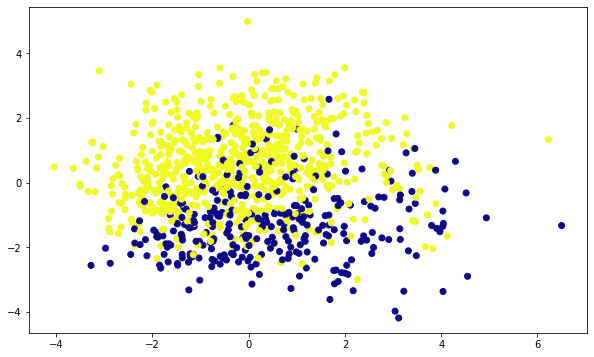

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['Risk'], cmap='plasma')
plt.xlabel = "First Principal Component"
plt.ylabel = "Second Principal component"
plt.show()

**Inference**


The principal Component Analysis is one of the primary Dimensionality Reduction Techniques. After applying PCA on the dataset; I see there has not been much concentration of information amongst any features i.e. the information has been dispersed heavily among all features and hence; there are no principal features that can directly contribute to best classification.


#K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeansy_predict = kmeans.fit(X_train).predict(X_test)
print(metrics.accuracy_score(Y_test,kmeansy_predict))

0.216


In [ ]:
fpr,tpr,tresholds = roc_curve(Y_test, kmeansy_predict)
roc_auc = auc(fpr, tpr)
roc_auc

0.46476899671711114

(-0.05, 1.05, -0.05, 1.05)

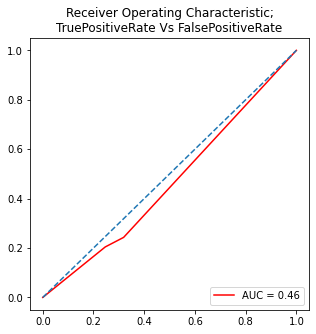

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic;\nTruePositiveRate Vs FalsePositiveRate')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')

**Inference**

Kmeans is a clustering algorithm that has generated a low accuracy of 26%. This being a case of binary classification, it is expected that the model will perform poorely. Also the AUC value also has been nearly 0.4 which means that model couldn't fighure out properly the "Risk" and "Not risk". 

#Random Forest Classifier

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
features_tree=['checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
'saving_account', 'present_emp_since', 'install_rate', 'personal_status',
'other_debtors', 'residence_since', 'property', 'age', 'invest_plans',
'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker']


In [ ]:
mod=RandomForestClassifier(n_estimators=100)
mod.fit(X_train,Y_train)
y_pred=mod.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.756


In [ ]:
print(confusion_matrix(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

[[ 28  41]
 [ 20 161]]
Precision: 0.7970297029702971
Recall: 0.8895027624309392


In [ ]:
fpr,tpr,tresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.6476499319401072

(-0.05, 1.05, -0.05, 1.05)

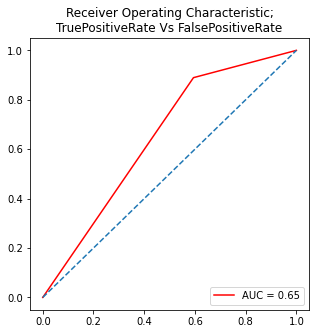

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic;\nTruePositiveRate Vs FalsePositiveRate')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')

**Inference**

Random Forest is a classification algorithm that uses the bagging technique. It acts like a collection of decision trees. It's expected to perform better than others and it did. 
Though the AUC curve os 0.66; the accuracy is 77% with less TYpe II errors.

#XG Boost Classifier

In [ ]:
xg_clf = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xg_clf.fit(X_train, Y_train)
pred_xg = xg_clf.predict(X_test)
acc_xg = accuracy_score(Y_test, pred_xg)

print(acc_xg)

0.76


In [ ]:
print(confusion_matrix(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

[[ 28  41]
 [ 20 161]]
Precision: 0.7970297029702971
Recall: 0.8895027624309392


In [ ]:
fpr,tpr,tresholds = roc_curve(Y_test, pred_xg)
roc_auc = auc(fpr, tpr)
roc_auc

0.6459284170069661

(-0.05, 1.05, -0.05, 1.05)

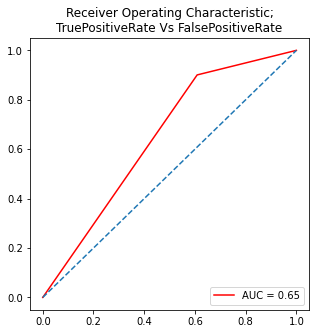

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic;\nTruePositiveRate Vs FalsePositiveRate')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')

**Inference**
XGBoost is a classification algorithm that has generated an accuracy of 76%, decently potraying the relationship between the binary variable "Risk" and the rest of the features. The AUC value is 0.67 which means the probability of a random sample being placed correctly is 0.67. Also, the False Positives are 34; which is a TYpe II error considered more worse for this dataset.

#Support Vector Machines

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_SVM = classifier.predict(X_test)

In [ ]:
acc_svm = accuracy_score(Y_test, pred_SVM)
print(acc_svm)

0.724


In [ ]:
print(confusion_matrix(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

[[ 28  41]
 [ 20 161]]
Precision: 0.7970297029702971
Recall: 0.8895027624309392


In [ ]:
fpr,tpr,tresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.6476499319401072

(-0.05, 1.05, -0.05, 1.05)

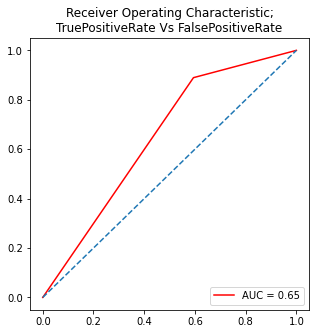

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic;\nTruePositiveRate Vs FalsePositiveRate')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')

#Gaussian Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(X_train, Y_train)
y_pred_gnb = model.predict(X_test)
print(accuracy_score(Y_test,y_pred_gnb)*100)

73.2


In [ ]:
print(confusion_matrix(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred_gnb))

[[ 28  41]
 [ 20 161]]
Precision: 0.7970297029702971
Recall: 0.7624309392265194


In [ ]:
fpr,tpr,tresholds = roc_curve(Y_test, y_pred_gnb)
roc_auc = auc(fpr, tpr)
roc_auc

0.7073024261349988

(-0.05, 1.05, -0.05, 1.05)

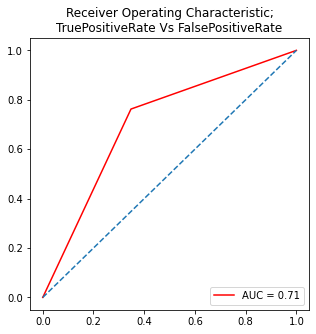

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic;\nTruePositiveRate Vs FalsePositiveRate')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')

**Inference**


Naive Bayes is a classification algorithm dependent on the Byes Theorem, it assumes that the presence of one feature in a dataset is independent and unaffected by any other feature.
This assumption is not fully possible in a real-time dataset where an Applicant's credit amount can depend on his salary, his housevalue can be dependent on costofliving, and so on.. 
It performed better on AUC; but the accuracy score is just 71%.

#K-Nearest Neighbours

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, Y_train)
y_pred  = knn.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)

72.39999999999999


In [ ]:
print(confusion_matrix(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

[[  9  60]
 [  9 172]]
Precision: 0.7413793103448276
Recall: 0.9502762430939227


In [ ]:
neig = np.arange(1,30)
train_acc = []
test_acc = []
for i, k in enumerate (neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,Y_train)
    train_acc.append(knn.score(X_train,Y_train))
    test_acc.append(knn.score(X_test,Y_test))

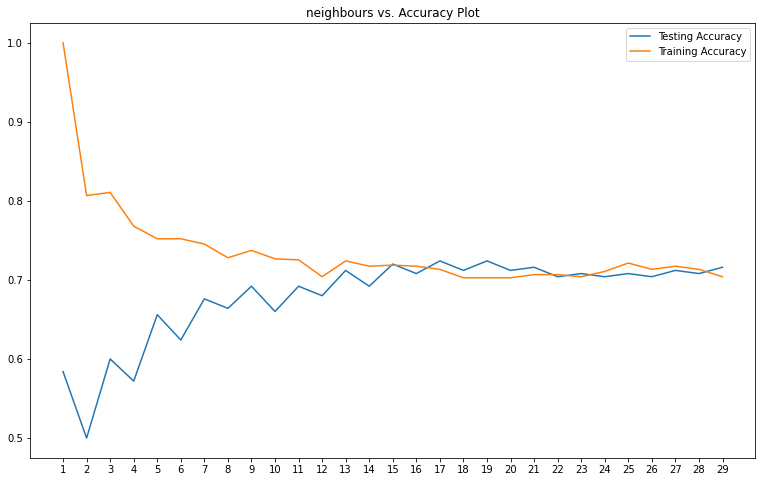

Best Accuracy is 0.724 with K = 17


In [ ]:
plt.figure(figsize=(13,8))
plt.plot(neig, test_acc, label = 'Testing Accuracy')
plt.plot(neig, train_acc, label = 'Training Accuracy')
plt.legend()
plt.title('neighbours vs. Accuracy Plot')
#plt.xlabel('Number of Neighbors')
#plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graphplot.png')
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_acc),1+test_acc.index(np.max(test_acc))))

In [ ]:
fpr,tpr,tresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.5403555128513091

(-0.05, 1.05, -0.05, 1.05)

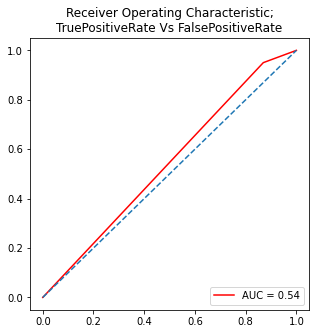

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic;\nTruePositiveRate Vs FalsePositiveRate')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')

##Decision Tree Classifier

In [ ]:
columns_dt = ['checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
'saving_account', 'present_emp_since', 'install_rate', 'personal_status',
'other_debtors', 'residence_since', 'property', 'age', 'invest_plans',
'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker']
target_dt=df.Risk


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)


In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.652


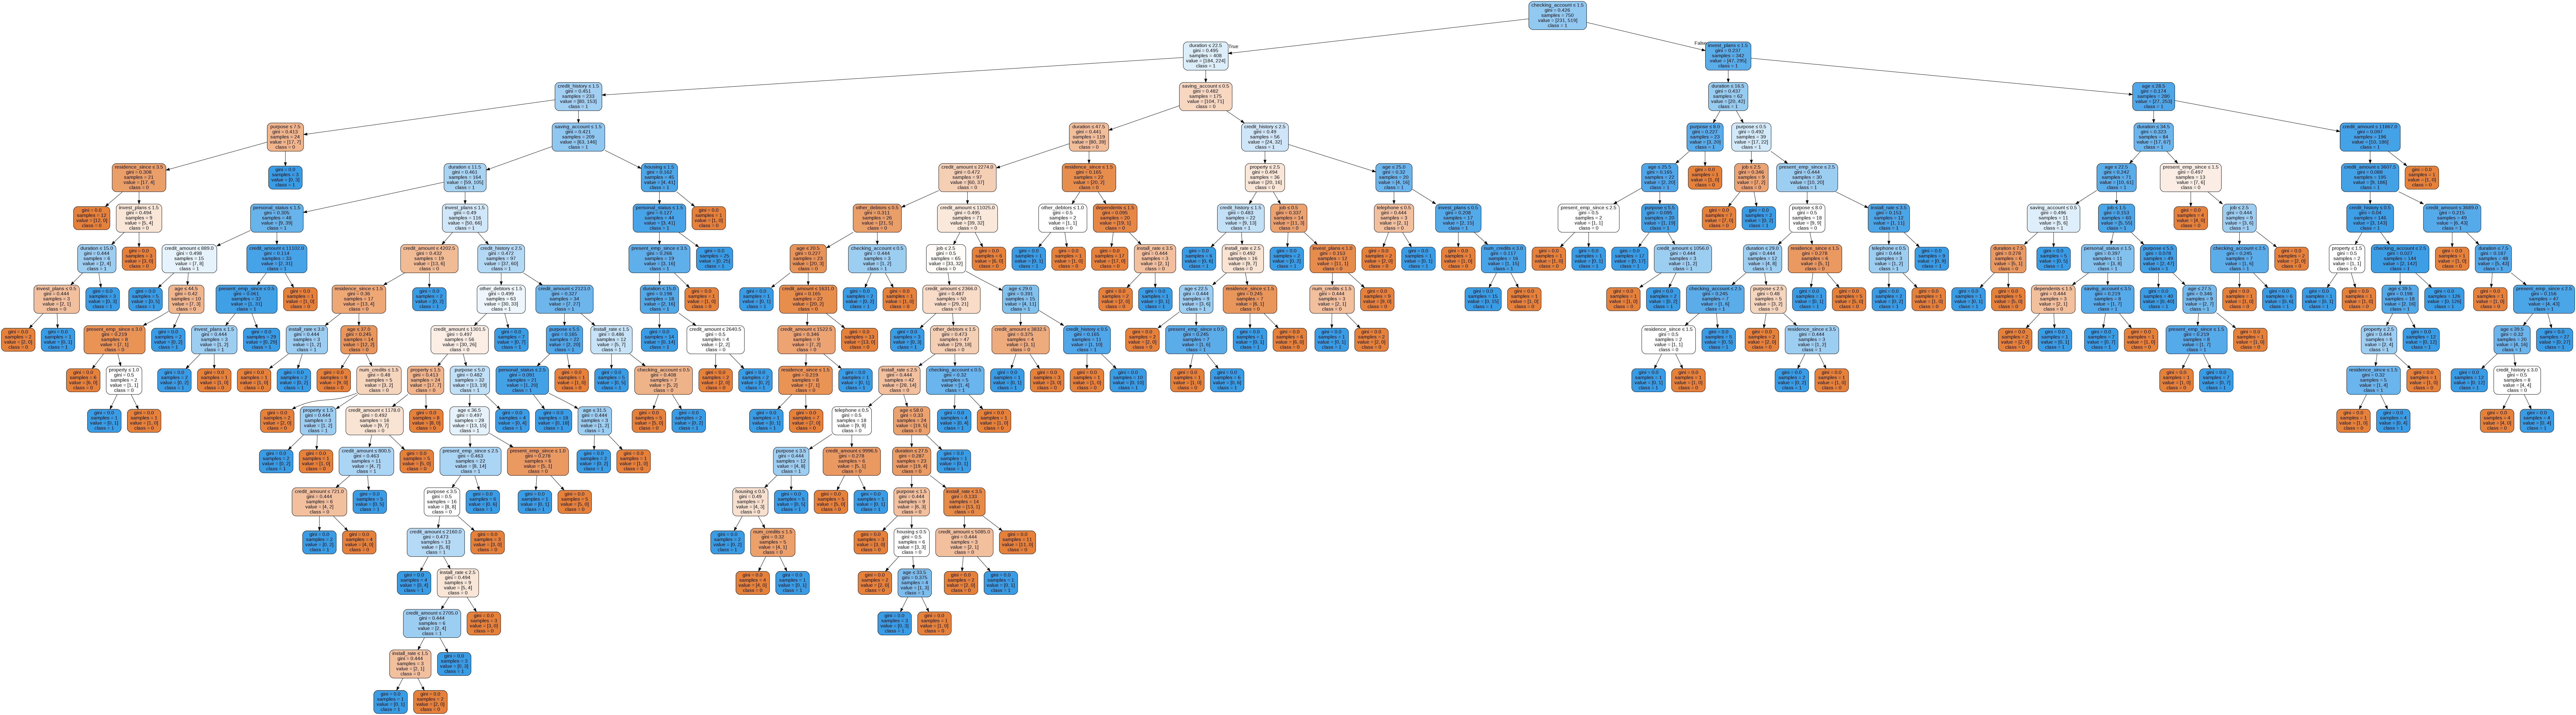

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names= columns_dt,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('germancredit.png')
Image(graph.create_png())


In [ ]:
print(confusion_matrix(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

[[ 27  42]
 [ 45 136]]
Precision: 0.7640449438202247
Recall: 0.7513812154696132


**Inference**


Decsion Trees is not a boosting or bagging algorithm but is a strong classifier by itself. The accuracy is 62% and the Type II errors have been huge i.e. 50. This means that the classifier failed to classify the "risk" and "not risk" applicants correctly. The boosting algorithm performed better. 

##Using the Manifold Technique to configure new features in the dataset:

I could engineer a Latent feature **"Bankability"**. It is a measure of how bankable or trustworthy the candidate is for a given credit score. I found 'credit_amount' and 'credit_history' to be two continous-valued features that can be used to generate the bankability score. The following is the latent feature generation.


In [ ]:
df_new=df


Displaying new dataset with latent "Bankability" Feature:


In [ ]:
df_new['bankability'] = (df_new['credit_amount'] * 0.7) + (df_new['credit_history'] * 0.3)
print(df_new.head(5))

   checking_account  duration  ...  Risk  bankability
0                 0         6  ...     1        819.5
1                 1        48  ...     0       4166.3
2                 3        12  ...     1       1468.4
3                 0        42  ...     1       5518.0
4                 0        24  ...     0       3409.9

[5 rows x 22 columns]


Yet again, the values in bankability column are too diverse; having a vast range of values; hence I have normalized this column using the log function; which is **"log_value_bankability"**

In [ ]:
df_new['log_value_bankability'] = np.log(df_new['bankability'])
print(df_new)

     checking_account  duration  ...  bankability  log_value_bankability
0                   0         6  ...        819.5               6.708694
1                   1        48  ...       4166.3               8.334784
2                   3        12  ...       1468.4               7.291929
3                   0        42  ...       5518.0               8.615771
4                   0        24  ...       3409.9               8.134438
..                ...       ...  ...          ...                    ...
995                 3        12  ...       1215.8               7.103158
996                 0        30  ...       2700.5               7.901192
997                 3        12  ...        563.4               6.333990
998                 0        45  ...       1292.1               7.164024
999                 1        45  ...       3204.4               8.072280

[1000 rows x 23 columns]


In [ ]:
y = df_new['Risk']
x = df_new.drop(['Risk'], axis=1)

Now, I will run various Machine Learning Algorithms to check if the latent feature has been benificial to our dataset, by checking their performance.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

##Logistic Regression with Latent Feature

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg.y = logreg.predict(x_test)
print(metrics.accuracy_score(y_test,logreg.y))


##Random Forest with Latent Feature


In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
          oob_score=False, random_state=None, verbose=0,
           warm_start=False)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
features_tree=['checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
'saving_account', 'present_emp_since', 'install_rate', 'personal_status',
'other_debtors', 'residence_since', 'property', 'age', 'invest_plans',
'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker']


In [ ]:
mod=RandomForestClassifier(n_estimators=100)
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.784


##XG Boost Classifier with Latent Feature


In [ ]:
xg_clf = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xg_clf.fit(x_train, y_train)
pred_xg = xg_clf.predict(x_test)
acc_xg = accuracy_score(y_test, pred_xg)

print(acc_xg)

0.716


After running various models on both the datasets i.e. with and out latent feature; I see there has not been much Improvement in performance and the performance has nearly been the same in most of the models. However, for the Logistic Regression performed better on the enriched dataset.


##Observations
![alt text](https://drive.google.com/uc?id=10yhnYZLNnJtCFZ8wl0Xd6pT4ve8e7Dvu)

##Conclusion
After training and testing all the models to understand which model performs better; **Random Forest, XGBoost,Logistic Regression** performed better with an accuracy of 76%.
In the original german.doc file which Prof.Hofmann created which had a description of all the features; its said that its essential to understand that **"It is worse to class a customer as good when they are bad"; i.e. the False-negatives or Type II errors are more worse than False Positives or Type I errors.**
Hence,  looking at the metrics; Random Forest and XGBoost predicted most number of Type II errors.
On the other hand, Looking at the Precision and Recall; it can be noted that the exactness or precision has been high for Random Forest which means its been more relevant and the recall has been highest for both Random Forest and XGBoost.

Hence, analysing all the performance metrics, it can be concluded that Random Forest and XGBoost performed better on our dataset.

Also, the performances could have improved if data enrichment could be done. The reason for not been able to perform data enrichment on this data is that:
1.The dataset is created by a Prof. which is fictional with mostly encoded values.
2.The continous columns that were present were age,credit_amount,etc which form no base to attach any relevant data.
3.Adding random data like bank ROI, stockvalue or anything would be irrelevant.